In [1]:
import keras
keras.__version__

/home/anirban/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [12]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

In [13]:
train_images = train_images.reshape((60000, 28, 28 , 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 , 28 , 1))
test_images = test_images.astype('float32') / 255

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 54s 895us/step - loss: 0.1762 - acc: 0.9454
Epoch 2/5
60000/60000 [==============================] - 53s 881us/step - loss: 0.0476 - acc: 0.9851
Epoch 3/5
60000/60000 [==============================] - 53s 881us/step - loss: 0.0336 - acc: 0.9895
Epoch 4/5
60000/60000 [==============================] - 53s 882us/step - loss: 0.0257 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 53s 890us/step - loss: 0.0197 - acc: 0.9941


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 308us/step


In [18]:
print('test_acc:', test_acc)

test_acc: 0.9918


[[2.1294337e-08 1.2618837e-08 9.9999702e-01 4.3958988e-07 2.5882491e-12
  7.6082988e-13 6.9501391e-11 1.9908526e-08 2.5026936e-06 9.5741340e-14]]
2


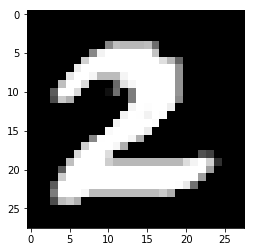

In [25]:
from keras.preprocessing import image 
from keras.applications.vgg16 import preprocess_input 
import numpy as np
import matplotlib.pyplot as plt
#temp_img=image.load_img("/home/anirban/mnist/train-images/"+"4"+".jpg",grayscale=True,target_size=(28,28)) 
temp_img=image.load_img("/home/anirban/Downloads/digit2.png",grayscale=True,target_size=(28,28)) 


temp_img=image.img_to_array(temp_img)
train_img=temp_img
#converting train images to array and applying mean subtraction processing
train_img=np.array(train_img)
train_img = train_img.reshape((1, 28 , 28 , 1)) 
train_img = train_img.astype('float32') / 255
#train_img=preprocess_input(train_img) print(train_img.shape) 
lab = model.predict(train_img) 
print(lab) 
print(np.argmax(lab))


img = image.load_img("/home/anirban/Downloads/digit2.png", target_size=(28, 28))
plt.imshow(img)